# **Part 2: Investment Analysis**

Analyzing whether TESLA should be included in the portfolio using different models and algorithms to analyze the potential impact of the new assets on the portfolio.

# **Contents**
* [1. Problem Definition](#problem)
* [2. Loading data and python packages](#1)
    * [2.1. Loading python packages](#1.1)    
    * [2.2. Data download](#1.2)
* [3. Understanding Data](#2)
* [4. Model Building](#3)
    * [4.1. Modern Portfolio Theory](#3.1)    
    * [4.2. Semi-covariance Model](#3.2)
    * [4.3. Capital Asset Pricing Model](#3.3)
    * [4.4. Black Litterman Model](#3.4)
* [5. LSTM ](#4)
* [6.Conclusion](#5)
* [7.References](#6)   



<a id='problem'></a>
# **1. Problem Definition**

David Michael Solomon, CEO of Goldman Sachs, is considering enhancing his investment portfolio by addding a new asset. Therefore, main objective is to assess whether Tesla should be included in this current portfolio, to determine how adding TSLA could affect the overall portfolio performance. This analysis will help David to make informed investment decisions that align with Goldman Sach's strategic objectives.

<a id='1'></a>
# **2. Loading data and python packages**

<a id='1.1'></a>
## **2.1. Loading python packages**

In [ ]:
!pip install yfinance
!pip install PyPortfolioOpt

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from pypfopt import plotting, objective_functions, EfficientSemivariance
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import black_litterman
from pypfopt import BlackLittermanModel
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

<a id='1.2'></a>
## **2.2. Data Download**

In [ ]:
tickers_with_tsla= ['TSLA', 'AAL', 'AAPL', 'ALL', 'ANET', 'ANSS', 'APA', 'APD', 'ARE', 'AVB', 'AVGO', 'BAC',
'BDX', 'BK', 'BLK', 'BRO', 'C', 'CB', 'CDW', 'CINF', 'CMCSA', 'CME', 'CMG', 'CPT',
'CTAS', 'CVS', 'CVX', 'DG', 'DUK', 'EBAY', 'ED', 'EG', 'ETN', 'ETSY', 'EXPD', 'FAST',
'FI', 'FITB', 'FMC', 'GE', 'GIS', 'GOOG', 'HBAN', 'HES', 'HII', 'HPQ', 'IPG', 'IR',
'JBHT', 'JPM', 'KHC', 'KMB', 'KMX', 'KO', 'LHX', 'LNT', 'LOW', 'LYV', 'MA', 'MAA']

In [ ]:
tickers_without_tsla= ['AAL', 'AAPL', 'ALL', 'ANET', 'ANSS', 'APA', 'APD', 'ARE', 'AVB', 'AVGO', 'BAC',
'BDX', 'BK', 'BLK', 'BRO', 'C', 'CB', 'CDW', 'CINF', 'CMCSA', 'CME', 'CMG', 'CPT',
'CTAS', 'CVS', 'CVX', 'DG', 'DUK', 'EBAY', 'ED', 'EG', 'ETN', 'ETSY', 'EXPD', 'FAST',
'FI', 'FITB', 'FMC', 'GE', 'GIS', 'GOOG', 'HBAN', 'HES', 'HII', 'HPQ', 'IPG', 'IR',
'JBHT', 'JPM', 'KHC', 'KMB', 'KMX', 'KO', 'LHX', 'LNT', 'LOW', 'LYV', 'MA', 'MAA']

In [ ]:
data_with_tsla= yf.download(tickers_with_tsla, start= '2021-10-01', end='2024-11-01')['Adj Close']
data_without_tsla= yf.download(tickers_without_tsla, start= '2021-10-01', end='2024-11-01')['Adj Close']

[*********************100%***********************]  60 of 60 completed
[*********************100%***********************]  59 of 59 completed


<a id='2'></a>
# **3. Understanding Data**

In [ ]:
data_with_tsla.isnull().sum()
data_without_tsla.isnull().sum()

,0
Ticker,
AAL,0
AAPL,0
ALL,0
ANET,0
ANSS,0
APA,0
APD,0
ARE,0
AVB,0


In [ ]:
data_with_tsla.head()

Ticker,AAL,AAPL,ALL,ANET,ANSS,APA,APD,ARE,AVB,AVGO,...,KMB,KMX,KO,LHX,LNT,LOW,LYV,MA,MAA,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-01 00:00:00+00:00,21.650000,140.300598,117.902618,87.620003,344.739990,20.393072,238.784058,173.527557,201.190475,45.383923,...,118.605804,127.180000,48.433800,205.934753,50.488518,192.347137,98.730003,353.416962,170.855560,258.406677
2021-10-04 00:00:00+00:00,21.389999,136.848419,116.877953,85.930000,334.989990,20.636295,237.448364,173.625961,203.023880,44.322311,...,118.578911,122.540001,48.406395,204.958954,51.429859,193.111984,97.970001,337.737000,172.083557,260.510010
2021-10-05 00:00:00+00:00,21.469999,138.785950,118.281097,88.237503,341.359985,20.776615,238.403778,171.828323,202.725861,45.204193,...,118.381493,126.230003,48.488613,208.608887,51.058762,192.885376,99.830002,336.765625,171.261871,260.196655
2021-10-06 00:00:00+00:00,20.540001,139.661285,117.690308,88.379997,344.609985,20.673714,241.863617,174.556030,204.432861,45.517090,...,119.386482,129.270004,49.064114,212.868698,51.665199,192.630417,101.029999,342.142731,173.456070,260.916656
2021-10-07 00:00:00+00:00,20.170000,140.930038,117.551819,91.029999,348.709991,21.328533,244.275269,174.511353,204.152878,45.995743,...,119.969742,131.350006,49.219402,216.406021,51.285038,196.313019,98.970001,347.703491,173.221252,264.536682


In [ ]:
data_with_tsla.columns

Index(['AAL', 'AAPL', 'ALL', 'ANET', 'ANSS', 'APA', 'APD', 'ARE', 'AVB',
       'AVGO', 'BAC', 'BDX', 'BK', 'BLK', 'BRO', 'C', 'CB', 'CDW', 'CINF',
       'CMCSA', 'CME', 'CMG', 'CPT', 'CTAS', 'CVS', 'CVX', 'DG', 'DUK', 'EBAY',
       'ED', 'EG', 'ETN', 'ETSY', 'EXPD', 'FAST', 'FI', 'FITB', 'FMC', 'GE',
       'GIS', 'GOOG', 'HBAN', 'HES', 'HII', 'HPQ', 'IPG', 'IR', 'JBHT', 'JPM',
       'KHC', 'KMB', 'KMX', 'KO', 'LHX', 'LNT', 'LOW', 'LYV', 'MA', 'MAA',
       'TSLA'],
      dtype='object', name='Ticker')

In [ ]:
data_with_tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2021-10-01 00:00:00+00:00 to 2024-10-11 00:00:00+00:00
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAL     762 non-null    float64
 1   AAPL    762 non-null    float64
 2   ALL     762 non-null    float64
 3   ANET    762 non-null    float64
 4   ANSS    762 non-null    float64
 5   APA     762 non-null    float64
 6   APD     762 non-null    float64
 7   ARE     762 non-null    float64
 8   AVB     762 non-null    float64
 9   AVGO    762 non-null    float64
 10  BAC     762 non-null    float64
 11  BDX     762 non-null    float64
 12  BK      762 non-null    float64
 13  BLK     762 non-null    float64
 14  BRO     762 non-null    float64
 15  C       762 non-null    float64
 16  CB      762 non-null    float64
 17  CDW     762 non-null    float64
 18  CINF    762 non-null    float64
 19  CMCSA   762 non-null    float64
 20  CME     762 non-null    flo

In [ ]:
#Returns

returns_with_tsla= data_with_tsla.pct_change().dropna()
returns_without_tsla= data_without_tsla.pct_change().dropna()

In [ ]:
market_return= 0.07

risk_free_rate= 0.01

beta= 2.3

expected_returns_with_tsla= risk_free_rate + beta*(market_return - risk_free_rate)
expected_returns_without_tsla= risk_free_rate

In [ ]:
expected_returns_with_tsla

0.14800000000000002

In [ ]:
returns_with_tsla.describe()

Ticker,AAL,AAPL,ALL,ANET,ANSS,APA,APD,ARE,AVB,AVGO,...,KMB,KMX,KO,LHX,LNT,LOW,LYV,MA,MAA,TSLA
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,...,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,-0.000381,0.000785,0.000753,0.002434,0.000163,0.000799,0.000520,-0.000330,0.000219,0.002113,...,0.000308,-0.000370,0.000525,0.000352,0.000306,0.000613,0.000468,0.000584,-0.000032,0.000492
std,0.028873,0.017333,0.016523,0.027881,0.021150,0.029158,0.017118,0.019049,0.014410,0.024199,...,0.011740,0.027063,0.009907,0.015409,0.013152,0.016703,0.023247,0.015648,0.014827,0.037839
min,-0.135417,-0.058680,-0.129042,-0.157218,-0.061161,-0.149173,-0.155518,-0.086718,-0.050188,-0.103521,...,-0.057305,-0.246008,-0.069626,-0.063191,-0.046670,-0.061870,-0.123011,-0.060450,-0.049434,-0.123346
25%,-0.016739,-0.008215,-0.008102,-0.012875,-0.012100,-0.015982,-0.007799,-0.010434,-0.008767,-0.011920,...,-0.005726,-0.014587,-0.004849,-0.007987,-0.007089,-0.008499,-0.010939,-0.007780,-0.009000,-0.020332
50%,-0.000664,0.000988,0.000458,0.001615,-0.000487,0.001206,0.000513,-0.000490,0.000180,0.000748,...,0.000552,-0.000240,0.000969,0.000296,0.000390,0.000807,0.000351,0.000886,-0.000393,0.001535
75%,0.014697,0.010119,0.010333,0.015997,0.011057,0.017037,0.009360,0.010314,0.009138,0.014273,...,0.006613,0.014344,0.005829,0.008567,0.008346,0.009828,0.012115,0.008420,0.008545,0.020503
max,0.106246,0.088974,0.058512,0.203882,0.180829,0.090962,0.095236,0.116743,0.080765,0.122687,...,0.081265,0.100741,0.038671,0.099579,0.040870,0.094787,0.151414,0.091233,0.075988,0.153069


In [ ]:
## Covariance Method

cov_matrix_with_tsla= returns_with_tsla.cov()
cov_matrix_without_tsla= returns_without_tsla.cov()

<a id='3'></a>
# **4. Model Building**

<a id='3.1'></a>
## **4.1. Modern Portfolio Theory**

Using this theory to maximize the expected returns based on a given level of risk.

In [ ]:
## Expected Returns

mu_with_tsla= expected_returns.mean_historical_return(data_with_tsla)
mu_without_tsla= expected_returns.mean_historical_return(data_without_tsla)

# Covariance Matrix
s_with_tsla= risk_models.sample_cov(data_with_tsla)
s_without_tsla= risk_models.sample_cov(data_without_tsla)

# Efficient frontier optimization
ef_with_tsla= EfficientFrontier(mu_with_tsla, s_with_tsla)
ef_without_tsla= EfficientFrontier(mu_without_tsla, s_without_tsla)

#Maximizing Sharpe Ratio
weights_with_tsla= ef_with_tsla.max_sharpe()
weights_without_tsla= ef_without_tsla.max_sharpe()


#Clean Weights
cleaned_weights_with_tsla= ef_with_tsla.clean_weights()
cleaned_weights_without_tsla= ef_without_tsla.clean_weights()

#Portfolio Performance
print('----With Tesla----')
perf_with_tsla= ef_with_tsla.portfolio_performance(verbose=True)
print('----Without Tesla----')
perf_without_tsla= ef_without_tsla.portfolio_performance(verbose=True)

----With Tesla----
Expected annual return: 38.4%
Annual volatility: 18.8%
Sharpe Ratio: 1.93
----Without Tesla----
Expected annual return: 38.4%
Annual volatility: 18.8%
Sharpe Ratio: 1.93


>> Both portfolios are expected to yield a return of 38.4% anually. This suggests that the inclusion of TSLA may not have provided any additional expected return based on historical data.

In [ ]:
mu_with_tsla


,0
Ticker,
AAL,-0.182295
AAPL,0.173669
ALL,0.167656
ANET,0.676240
ANSS,-0.014336
APA,0.098329
APD,0.097979
ARE,-0.120877
AVB,0.029449


In [ ]:
## Covariance Shrinkage- Estimates by shrinking exteme values towards mean

mu_with_tsla= expected_returns.mean_historical_return(data_with_tsla)
mu_without_tsla= expected_returns.mean_historical_return(data_without_tsla)

S_with_tsla= risk_models.CovarianceShrinkage(data_with_tsla).ledoit_wolf()
S_without_tsla= risk_models.CovarianceShrinkage(data_without_tsla).ledoit_wolf()

ef_with_tsla= EfficientFrontier(mu_with_tsla, S_with_tsla)
ef_without_tsla= EfficientFrontier(mu_without_tsla, S_without_tsla)

ef_with_tsla.max_sharpe()
ef_without_tsla.max_sharpe()

weights_with_tsla= ef_with_tsla.clean_weights()
weights_without_tsla= ef_without_tsla.clean_weights()

print('------With TSLA------')
perf_with_tsla= ef_with_tsla.portfolio_performance(verbose=True)
print('-----Withot TSLA-----')
perf_without_tsla= ef_without_tsla.portfolio_performance(verbose=True)


------With TSLA------
Expected annual return: 38.4%
Annual volatility: 18.8%
Sharpe Ratio: 1.94
-----Withot TSLA-----
Expected annual return: 38.4%
Annual volatility: 18.8%
Sharpe Ratio: 1.94


>> By adding TSLA to the portfolio, the annual return is 0.01% lower with same volatility. Having TSLA in the portfolio can only offer little lower margin.

In [ ]:
# L2 regularization and target return optimization

ef_with_tsla= EfficientFrontier(mu_with_tsla, s_with_tsla, weight_bounds=(0,1))
ef_without_tsla= EfficientFrontier(mu_without_tsla, s_without_tsla,weight_bounds=(0,1))

ef_with_tsla.add_objective(objective_functions.L2_reg, gamma=0.1)
ef_without_tsla.add_objective(objective_functions.L2_reg, gamma=0.1)

ef_with_tsla.efficient_return(target_return=0.07)
ef_without_tsla.efficient_return(target_return=0.07)

weights_with_tsla= ef_with_tsla.clean_weights()
weights_without_tsla= ef_without_tsla.clean_weights()

print('-----With TSLA-----')
perf_with_tsla= ef_with_tsla.portfolio_performance(verbose=True)
print('-----Without TSLA-----')
perf_without_tsla= ef_without_tsla.portfolio_performance(verbose=True)

-----With TSLA-----
Expected annual return: 10.2%
Annual volatility: 12.6%
Sharpe Ratio: 0.65
-----Without TSLA-----
Expected annual return: 10.2%
Annual volatility: 12.6%
Sharpe Ratio: 0.65


>> Both portfolios significantly exceed the target return of 7%, achieving 10.2% instead. The annual volatility is same for both portfolios. Since the metrics are identical, TSLA doesnot provide any additional value in terms of return, risk-adjustment performance.

<a id='3.2'></a>
## **4.2. Semi-covariance Model**

It docuses on downside risk rather than overall volatility. Using Efficient Semivariance model, it can prioritizes downside risk, reflects better investor behavior, and enhances risk-adjusted performance analysis.

In [ ]:
returns_with_tsla= expected_returns.returns_from_prices(data_with_tsla)
returns_without_tsla= expected_returns.returns_from_prices(data_without_tsla)

returns_with_tsla= returns_with_tsla.dropna()
returns_without_tsla= returns_without_tsla.dropna()

returns_with_tsla

Ticker,AAL,AAPL,ALL,ANET,ANSS,APA,APD,ARE,AVB,AVGO,...,KMB,KMX,KO,LHX,LNT,LOW,LYV,MA,MAA,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-04 00:00:00+00:00,-0.012009,-0.024606,-0.008691,-0.019288,-0.028282,0.011926,-0.005594,0.000567,0.009113,-0.023392,...,-0.000227,-0.036484,-0.000566,-0.004739,0.018645,0.003977,-0.007698,-0.044367,0.007187,0.008140
2021-10-05 00:00:00+00:00,0.003740,0.014158,0.012005,0.026853,0.019015,0.006800,0.004023,-0.010353,-0.001468,0.019897,...,-0.001665,0.030113,0.001698,0.017808,-0.007216,-0.001173,0.018985,-0.002876,-0.004775,-0.001203
2021-10-06 00:00:00+00:00,-0.043316,0.006307,-0.004995,0.001615,0.009521,-0.004952,0.014513,0.015875,0.008420,0.006922,...,0.008489,0.024083,0.011869,0.020420,0.011877,-0.001322,0.012020,0.015967,0.012812,0.002767
2021-10-07 00:00:00+00:00,-0.018014,0.009085,-0.001177,0.029984,0.011898,0.031674,0.009971,-0.000256,-0.001370,0.010516,...,0.004886,0.016090,0.003165,0.016617,-0.007358,0.019118,-0.020390,0.016253,-0.001354,0.013874
2021-10-08 00:00:00+00:00,-0.004958,-0.002722,-0.003612,0.021422,-0.008718,0.068421,0.007898,-0.013786,-0.009689,-0.002166,...,-0.006208,-0.006167,0.004454,0.010970,-0.012355,-0.008369,-0.006366,0.002967,-0.003440,-0.010232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07 00:00:00+00:00,0.001738,-0.022531,-0.048906,-0.008662,-0.008425,0.002975,0.095236,-0.011662,-0.013664,-0.008832,...,-0.000781,-0.011219,-0.016531,-0.007798,-0.014122,0.002913,-0.000451,-0.012859,-0.006985,-0.036988
2024-10-08 00:00:00+00:00,0.033825,0.018404,0.008938,0.019565,0.024915,-0.026326,-0.007452,0.002113,0.002294,0.032271,...,0.008737,-0.001937,0.002463,-0.001985,0.004213,0.017614,0.006948,0.011724,-0.003256,0.015239
2024-10-09 00:00:00+00:00,0.000839,0.016698,0.011156,0.016766,0.016611,0.002666,0.011632,0.005360,-0.000137,0.028883,...,0.001197,-0.012893,0.005637,0.003896,-0.000503,0.014308,0.008693,0.007152,0.001568,-0.014110


In [ ]:
ef_with_tsla= EfficientSemivariance(mu_with_tsla,returns_with_tsla)
ef_without_tsla= EfficientSemivariance(mu_without_tsla, returns_without_tsla)

ef_with_tsla.efficient_return(target_return=0.07)
ef_without_tsla.efficient_return(target_return=0.07)

weights_with_tsla= ef_with_tsla.clean_weights()
weights_without_tsla= ef_without_tsla.clean_weights()

print('-----With TSLA-----')
perf_with_tsla= ef_with_tsla.portfolio_performance(verbose=True)
print('-----Without TSLA-----')
perf_without_tsla= ef_without_tsla.portfolio_performance(verbose=True)

-----With TSLA-----
Expected annual return: 13.0%
Annual semi-deviation: 8.3%
Sortino Ratio: 1.32
-----Without TSLA-----
Expected annual return: 13.0%
Annual semi-deviation: 8.3%
Sortino Ratio: 1.32


>> Both portfolios shows similar risk characteristics, the portfolio without TSLA offers a marginally better expected return and Sortino Ratio. The goal is to maximize returns while managing downside risk, the portfolio without TSLA appears to be slightly favorable based on these metrics.

<a id='3.3'></a>
## **4.3. Capital Asset Prising Model**

It helps to understand risk  and return dynamics and can offer improved risk management, tailored optimization for target returns, and a clear focus on investor preferences.

In [ ]:
mu_with_tsla= expected_returns.capm_return(data_with_tsla)
mu_without_tsla= expected_returns.capm_return(data_without_tsla)

S_with_tsla= risk_models.CovarianceShrinkage(data_with_tsla).ledoit_wolf()
S_without_tsla= risk_models.CovarianceShrinkage(data_without_tsla).ledoit_wolf()

ef_with_tsla= EfficientFrontier(mu_with_tsla, S_with_tsla)
ef_without_tsla= EfficientFrontier(mu_without_tsla, S_without_tsla)

ef_with_tsla.add_objective(objective_functions.L2_reg, gamma=0.05)
ef_without_tsla.add_objective(objective_functions.L2_reg, gamma=0.05)

ef_with_tsla.efficient_return(target_return=0.07)
ef_without_tsla.efficient_return(target_return=0.07)

weights_with_tsla= ef_with_tsla.clean_weights()
weights_without_tsla= ef_without_tsla.clean_weights()

print('----With TSLA----')
perf_with_tsla= ef_with_tsla.portfolio_performance(verbose=True)
print('----Without TSLA----')
perf_without_tsla= ef_without_tsla.portfolio_performance(verbose=True)

----With TSLA----
Expected annual return: 7.8%
Annual volatility: 12.2%
Sharpe Ratio: 0.47
----Without TSLA----
Expected annual return: 7.9%
Annual volatility: 12.2%
Sharpe Ratio: 0.49


>> The portfolio without TSLA offers a marginally higher expected return and Sharpe ratio, while maintaing the same level of volatility. This could indicate that TSLA doesnot add significant value to the portfolio in terms of values.

<a id='3.4'></a>
## **4.4. Black Litterman Model**

In [ ]:
# Black Litterman Allocation

market_prices= yf.download('SPY', start= '2021-10-01', end='2024-11-01')['Adj Close']
market_prices.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-10-01,415.518463
2021-10-04,410.159912
2021-10-05,414.427643
2021-10-06,416.150085
2021-10-07,419.747986


In [ ]:
S_with_tsla= risk_models.CovarianceShrinkage(data_with_tsla).ledoit_wolf()
S_without_tsla= risk_models.CovarianceShrinkage(data_without_tsla).ledoit_wolf()

delta= black_litterman.market_implied_risk_aversion(market_prices)
delta

3.439152660153039

In [ ]:
mcaps_with_tsla= {}
for t in tickers_with_tsla:
    mcaps_with_tsla[t]= yf.Ticker(t).info['marketCap']
mcaps_with_tsla


{'TSLA': 695792566272,
 'AAL': 7742540288,
 'AAPL': 3459693150208,
 'ALL': 49713639424,
 'ANET': 130979807232,
 'ANSS': 28840200192,
 'APA': 10013328384,
 'APD': 70397952000,
 'ARE': 20571297792,
 'AVB': 31233695744,
 'AVGO': 847616868352,
 'BAC': 325514395648,
 'BDX': 68358430720,
 'BK': 53912834048,
 'BLK': 146685231104,
 'BRO': 29881088000,
 'C': 125418774528,
 'CB': 115900538880,
 'CDW': 29653872640,
 'CINF': 21309573120,
 'CMCSA': 159779340288,
 'CME': 79840706560,
 'CMG': 80320004096,
 'CPT': 12722621440,
 'CTAS': 83906363392,
 'CVS': 83819208704,
 'CVX': 274789433344,
 'DG': 18140788736,
 'DUK': 88162295808,
 'EBAY': 32435369984,
 'ED': 35417759744,
 'EG': 17048028160,
 'ETN': 135907360768,
 'ETSY': 5702026752,
 'EXPD': 17361565696,
 'FAST': 44008718336,
 'FI': 109589258240,
 'FITB': 29632114688,
 'FMC': 7571823616,
 'GE': 207276703744,
 'GIS': 39310807040,
 'GOOG': 2016636829696,
 'HBAN': 22352898048,
 'HES': 43071393792,
 'HII': 10172030976,
 'HPQ': 35655729152,
 'IPG': 117898

In [ ]:
mcaps_without_tsla= {}
for t in tickers_without_tsla:
    mcaps_without_tsla[t]= yf.Ticker(t).info['marketCap']
mcaps_without_tsla

{'AAL': 7742540288,
 'AAPL': 3459693150208,
 'ALL': 49713639424,
 'ANET': 130979807232,
 'ANSS': 28840200192,
 'APA': 10013328384,
 'APD': 70397952000,
 'ARE': 20571297792,
 'AVB': 31233695744,
 'AVGO': 847616868352,
 'BAC': 325514395648,
 'BDX': 68358430720,
 'BK': 53912834048,
 'BLK': 146685231104,
 'BRO': 29881088000,
 'C': 125418774528,
 'CB': 115900538880,
 'CDW': 29653872640,
 'CINF': 21309573120,
 'CMCSA': 159779340288,
 'CME': 79840706560,
 'CMG': 80320004096,
 'CPT': 12722621440,
 'CTAS': 83906363392,
 'CVS': 83819208704,
 'CVX': 274789433344,
 'DG': 18140788736,
 'DUK': 88162295808,
 'EBAY': 32435369984,
 'ED': 35417759744,
 'EG': 17048028160,
 'ETN': 135907360768,
 'ETSY': 5702026752,
 'EXPD': 17361565696,
 'FAST': 44008718336,
 'FI': 109589258240,
 'FITB': 29632114688,
 'FMC': 7571823616,
 'GE': 207276703744,
 'GIS': 39310807040,
 'GOOG': 2016636829696,
 'HBAN': 22352898048,
 'HES': 43071393792,
 'HII': 10172030976,
 'HPQ': 35655729152,
 'IPG': 11789801472,
 'IR': 406550487

In [ ]:
market_prior_with_tsla= black_litterman.market_implied_prior_returns(mcaps_with_tsla, delta, S_with_tsla)
market_prior_without_tsla= black_litterman.market_implied_prior_returns(mcaps_without_tsla, delta, S_without_tsla)

In [ ]:
views={'TSLA':0.15}

In [ ]:
views_without_tsla = {ticker: view for ticker, view in views.items() if ticker in tickers_without_tsla}
views_with_tsla= {ticker: view for ticker, view in views.items() if ticker in tickers_with_tsla}


In [ ]:
b1_with_tsla= BlackLittermanModel(S_with_tsla, pi=market_prior_with_tsla, absolute_views=views_with_tsla)
b1_without_tsla= BlackLittermanModel(S_without_tsla, pi=market_prior_without_tsla, absolute_views=views_without_tsla)

adjusted_returns_with_tsla= b1_with_tsla.bl_returns()
adjusted_returns_without_tsla= b1_without_tsla.bl_returns()

ef_with_tsla= EfficientFrontier(adjusted_returns_with_tsla, S_with_tsla)
ef_without_tsla= EfficientFrontier(adjusted_returns_without_tsla, S_without_tsla)

weights_with_tsla= ef_with_tsla.max_sharpe()
weights_without_tsla= ef_without_tsla.max_sharpe()

cleaned_weights_with_tsla= ef_with_tsla.clean_weights()
cleaned_weights_without_tsla= ef_without_tsla.clean_weights()

In [ ]:
print('Optimal Weights with TSLA', cleaned_weights_with_tsla)
print('Optimal Weights without TSLA', cleaned_weights_without_tsla)

Optimal Weights with TSLA OrderedDict([('AAL', 0.0005), ('AAPL', 0.31104), ('ALL', 0.00474), ('ANET', 0.01179), ('ANSS', 0.00247), ('APA', 0.00081), ('APD', 0.0064), ('ARE', 0.00191), ('AVB', 0.00244), ('AVGO', 0.07602), ('BAC', 0.02923), ('BDX', 0.00639), ('BK', 0.00444), ('BLK', 0.0134), ('BRO', 0.00299), ('C', 0.01116), ('CB', 0.01052), ('CDW', 0.00255), ('CINF', 0.00215), ('CMCSA', 0.01446), ('CME', 0.00706), ('CMG', 0.00715), ('CPT', 0.00091), ('CTAS', 0.00768), ('CVS', 0.00747), ('CVX', 0.02491), ('DG', 0.00155), ('DUK', 0.00823), ('EBAY', 0.00265), ('ED', 0.00366), ('EG', 0.00136), ('ETN', 0.01265), ('ETSY', 0.00023), ('EXPD', 0.00159), ('FAST', 0.0043), ('FI', 0.0098), ('FITB', 0.00288), ('FMC', 0.00056), ('GE', 0.01873), ('GIS', 0.00385), ('GOOG', 0.18232), ('HBAN', 0.0018), ('HES', 0.00426), ('HII', 0.00087), ('HPQ', 0.00326), ('IPG', 0.0013), ('IR', 0.00351), ('JBHT', 0.00154), ('JPM', 0.05656), ('KHC', 0.00344), ('KMB', 0.00486), ('KMX', 0.00079), ('KO', 0.02724), ('LHX', 0

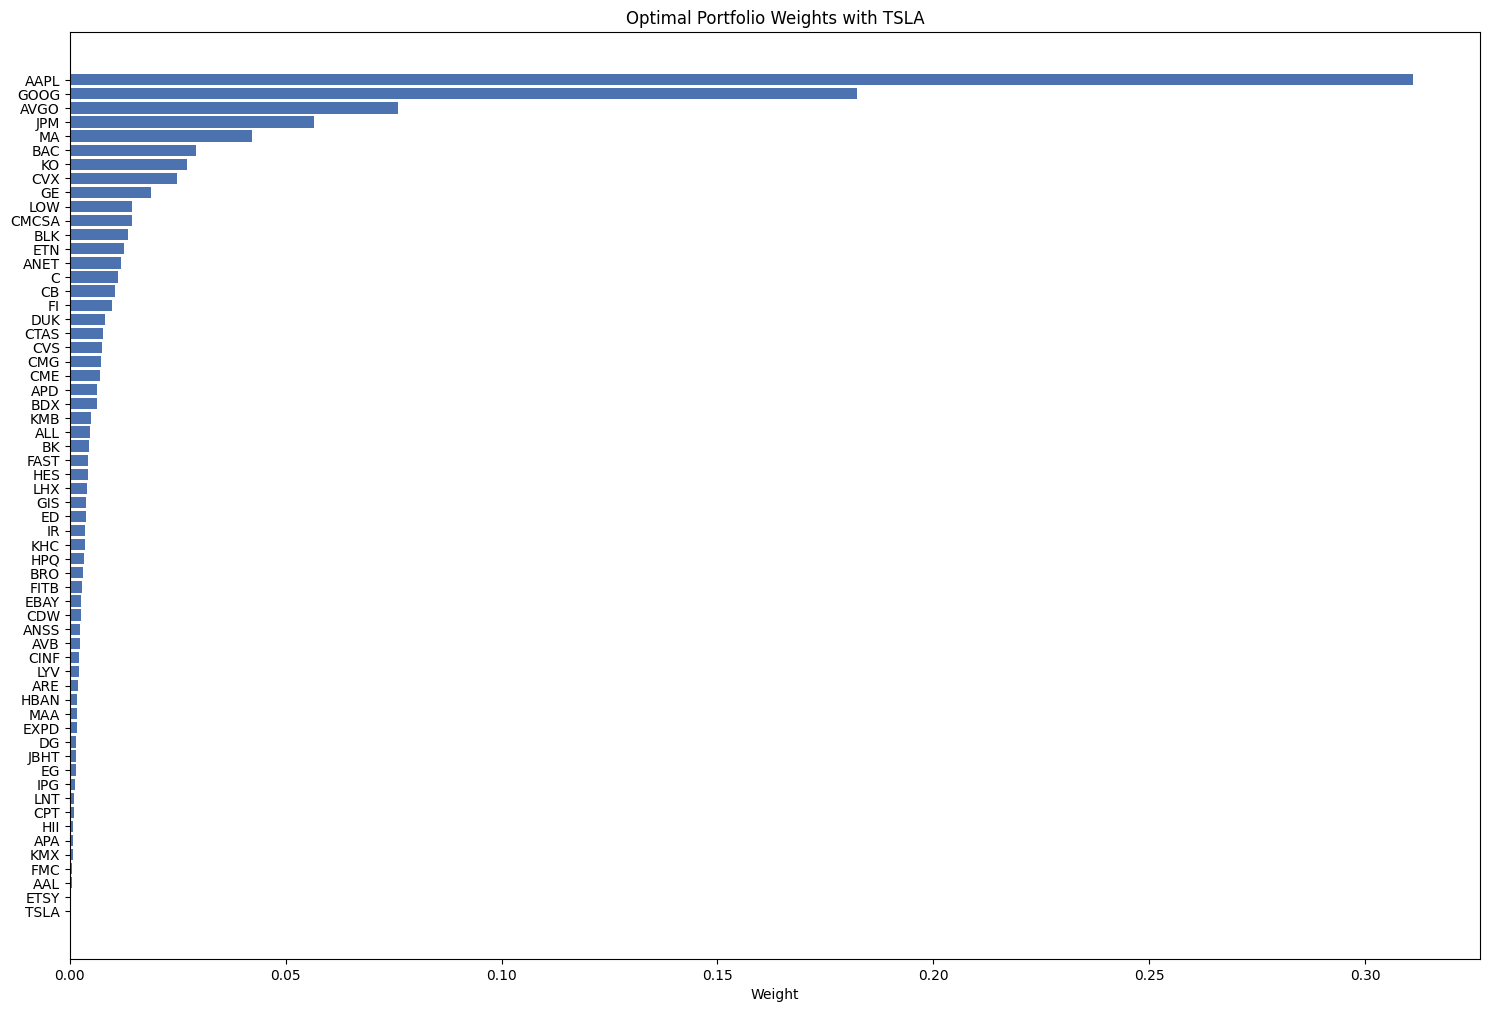

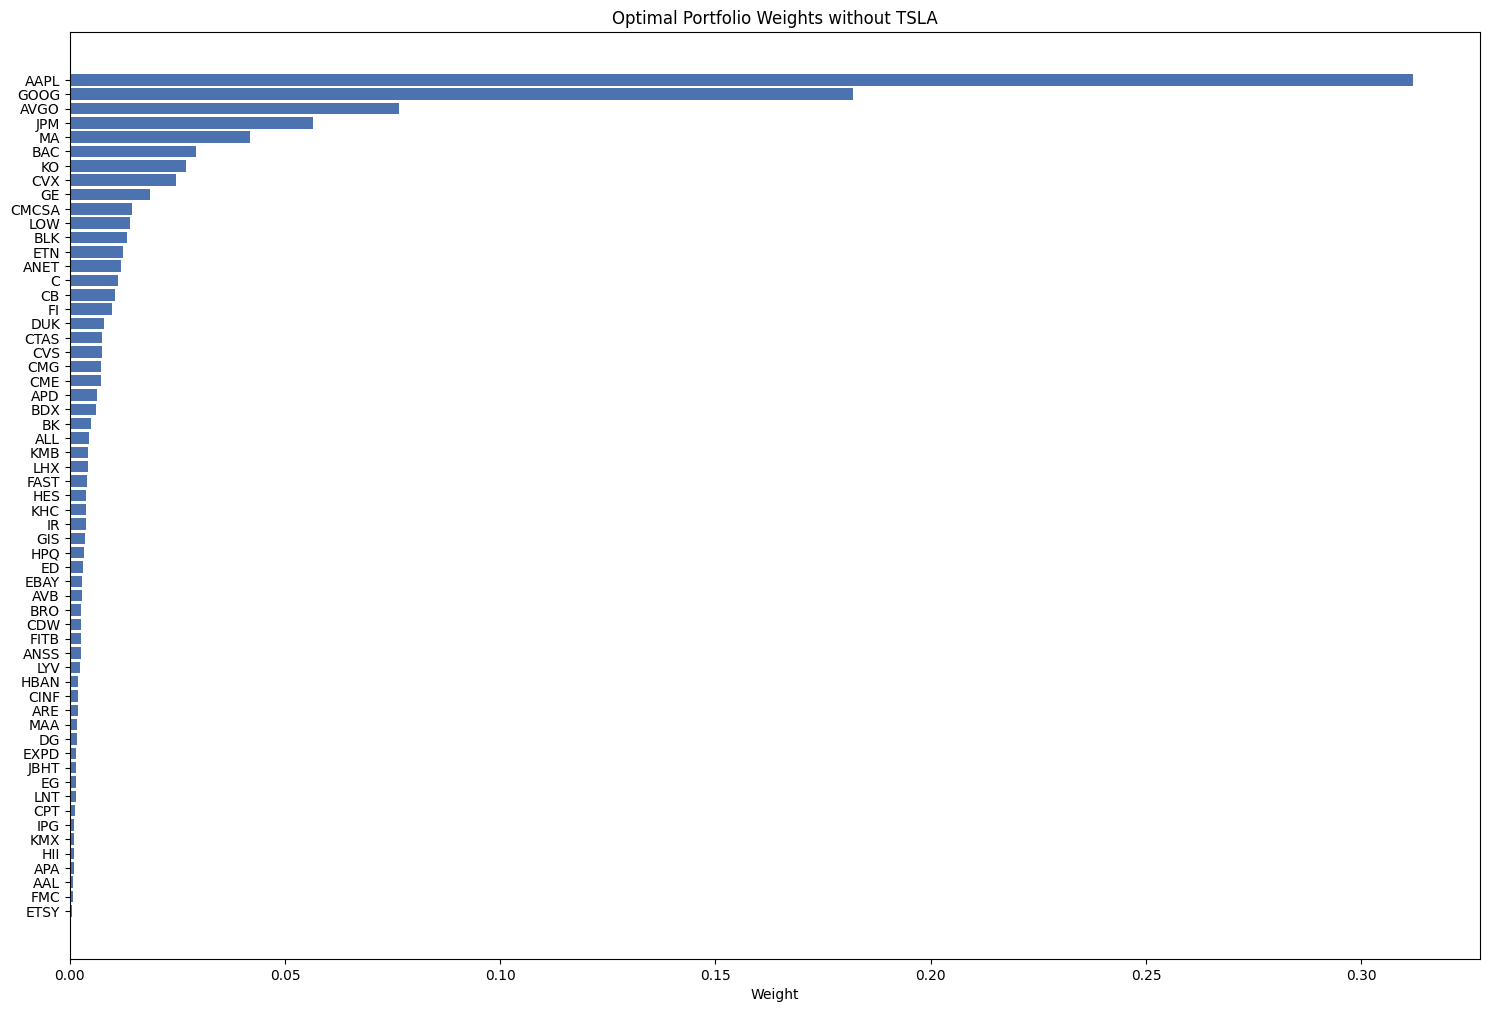

In [ ]:
#PLotting weights

plt.figure(figsize=(15,10))
plotting.plot_weights(cleaned_weights_with_tsla)
plt.title('Optimal Portfolio Weights with TSLA')
plt.show()

plt.figure(figsize=(15,10))
plotting.plot_weights(cleaned_weights_without_tsla)
plt.title('Optimal Portfolio Weights without TSLA')
plt.show()

Based on the Black Litterman Model, the optimal weights for portfolio has been calculated and TSLA has been assigned weight of 0% which indicates it might not be the best fit for the current investment strategy.

<a id='4'></a>
# **5. LSTM to predict TSLA**

In [ ]:
tesla= yf.download('TSLA', start= '2021-10-01', end='2024-11-01')[['Adj Close']].rename(columns={'Adj Close': 'Tesla'})
sp_500= yf.download('^GSPC',  start= '2021-10-01', end='2024-11-01')[['Adj Close']].rename(columns={'Adj Close': 'SP500'})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data= pd.concat([tesla, sp_500], axis=1)

In [ ]:
tesla.isnull().sum()

,0
Tesla,0


In [ ]:
tesla.describe()

,Tesla
count,762.000000
mean,238.286461
std,59.423572
min,108.099998
25%,190.764999
50%,235.755005
75%,273.378326
max,409.970001


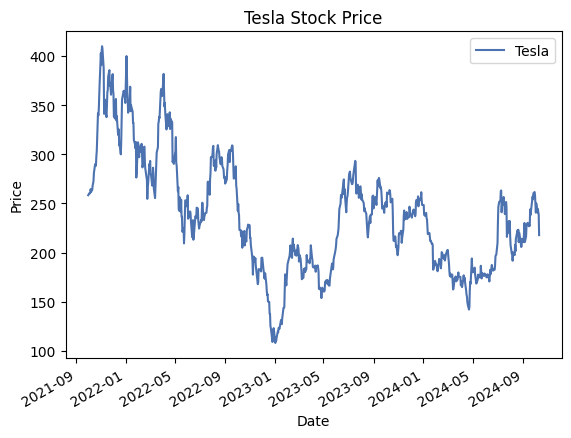

In [ ]:
tesla.plot()
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
data.head()

,Tesla,SP500
Date,,
2021-10-01,258.406677,4357.040039
2021-10-04,260.510010,4300.459961
2021-10-05,260.196655,4345.720215
2021-10-06,260.916656,4363.549805
2021-10-07,264.536682,4399.759766


In [ ]:
for i in range(1,11):
  data[f'SP500_lag_{i}']= data['SP500'].shift(i)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.columns

Index(['Tesla', 'SP500', 'SP500_lag_1', 'SP500_lag_2', 'SP500_lag_3',
       'SP500_lag_4', 'SP500_lag_5', 'SP500_lag_6', 'SP500_lag_7',
       'SP500_lag_8', 'SP500_lag_9', 'SP500_lag_10'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
Tesla,0
SP500,0
SP500_lag_1,0
SP500_lag_2,0
SP500_lag_3,0
SP500_lag_4,0
SP500_lag_5,0
SP500_lag_6,0
SP500_lag_7,0
SP500_lag_8,0


In [ ]:
X= data[[f'SP500_lag_{i}' for i in range(1,11)]]
y= data['Tesla']

In [ ]:
# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshaping for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [ ]:
# Train-test split (80% training, 20% testing)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [ ]:
#Model with 2 LSTM layers, dropout for regularization, and final dense output
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 10)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate= 0.001), loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [ ]:
y_pred= model.predict(X_test)

y_pred= y_pred[:,0]

mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Mean Absolute Error: 0.3851207618175841
Mean Squared Error: 0.2512763768206661
Root Mean Squared Error: 0.501274751828442


>> The MSE of 0.25 suggests the average squared error of predictions. RMSE of 0.5, indicates that predictions are about 0.309 units away from the actual values.

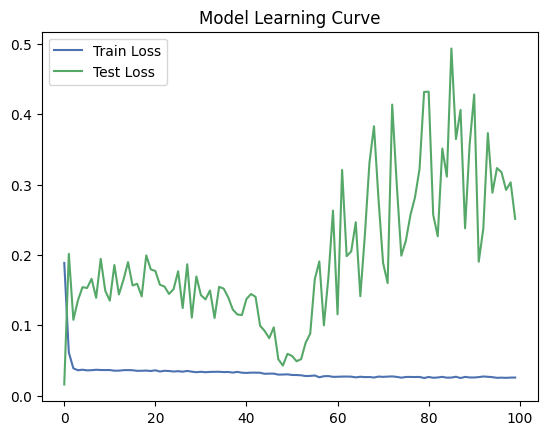

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Learning Curve')
plt.show()

>> The model is not learning properly so further enhancement is needed.

In [ ]:
#Model with 2 LSTM layers, dropout for regularization, batch normalization, and a dense output layer.
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 10)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(50, activation='relu', return_sequences= True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate= 0.001), loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [ ]:
y_pred= model.predict(X_test)

y_pred= y_pred[:,0]

mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
Mean Absolute Error: 0.2808778518945949
Mean Squared Error: 0.13229429430990258
Root Mean Squared Error: 0.36372282621510377


>> The MSE of 0.13 suggests the average squared error of predictions. RMSE of 0.309, indicates that predictions are about 0.36 units away from the actual values.

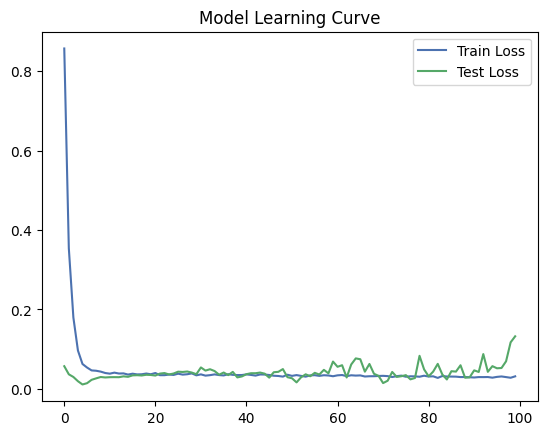

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Learning Curve')
plt.show()

>> Learning is better than the previous model.

In [ ]:
#Model with 4 LSTM layers, dropout  and batch normalization for regularization, followed by a dense layer , and a final output layer.
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(1, 10)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(64, activation='relu', return_sequences= True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(64, activation='relu', return_sequences= True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate= 0.001), loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [ ]:
y_pred= model.predict(X_test)

y_pred= y_pred[:,0]

mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
Mean Absolute Error: 0.2163268355791528
Mean Squared Error: 0.05738427113592056
Root Mean Squared Error: 0.23955014326007104


>> The MSE of 0.05 suggests the average squared error of predictions. RMSE of 0.05, indicates that predictions are about 0.23 units away from the actual values. Lower the MSE and RMSE, better is the model.

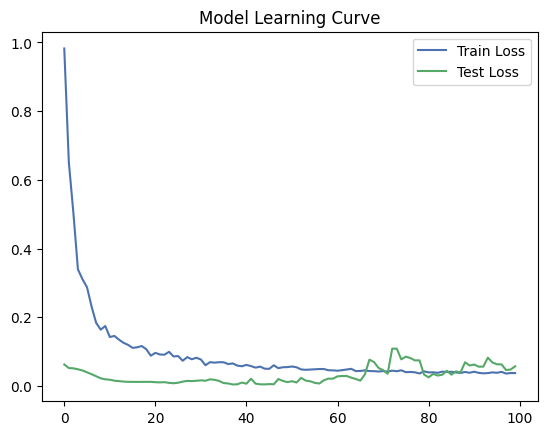

In [ ]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Learning Curve')
plt.show()

In [ ]:
def predict_next_30_days(model, last_10_days_sp500, scaler_y):

  # Reshape the input
  input_seq = last_10_days_sp500.reshape((1, 1, last_10_days_sp500.shape[0]))

  predicted_30_days = []
  current_seq = input_seq
  for _ in range(30):
    prediction = model.predict(current_seq)
    predicted_30_days.append(prediction[0, 0])  # Append the prediction

    # Update the current sequence for the next prediction
    current_seq = np.concatenate([current_seq[:, :, 1:], prediction.reshape(1, 1, 1)], axis=2)

  # Rescale the predictions back to the original scale
  predictions_rescaled = scaler_y.inverse_transform(np.array(predicted_30_days).reshape(-1, 1))
  return predictions_rescaled

In [ ]:
last_10_days_sp500_scaled= X_scaled[-1,0,:]
predicted_30_days= predict_next_30_days(model, last_10_days_sp500_scaled, scaler_y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

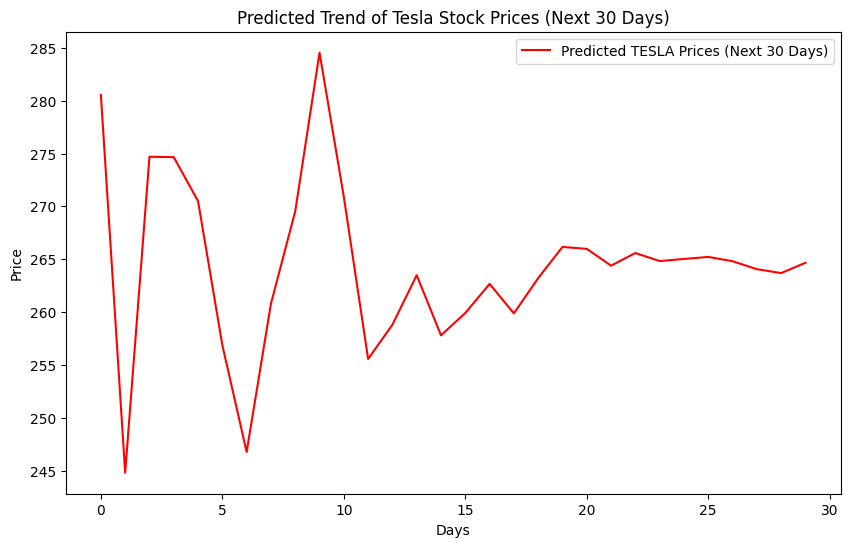

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 30), predicted_30_days.flatten(), label='Predicted TESLA Prices (Next 30 Days)', color='red')
plt.title('Predicted Trend of Tesla Stock Prices (Next 30 Days)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

>> As from the plot, it can be observedvthat the price of Tesla is quite volatile.

<a id='5'></a>
# **6. Conclusion**

Based on the analysis using multiple models:

Not to add Tesla to the current portfolio. The marginal differences in expected return and risk, as well as the Black-Litterman’s model’s recommendation, suggest that TSLA would not significantly enhance the portfolio’s performance.

Focusing on maintaining a diversified portfolio of assets across various sectors, optimizing for risk-adjusted returns using MPT and semi-covariance models.

Continue monitoring TSLA’s performance in the future, especially as market conditions and volatility may change.


<a id='6'></a>
# **7. References**

> **PyPortfolio Documentation:** https://pyportfolioopt.readthedocs.io/en/latest/<br>
**LSTM Documentation:** https://keras.io/api/layers/recurrent_layers/lstm/ <br>
**Model Evaluation Documentation:** https://scikit-learn.org/stable/modules/model_evaluation.html